In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

import gd as gd
import math
from random import randint
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from scipy.io.arff import loadarff

In [31]:
DEVIATION_BITS = 2
DATA = "data/Glass/Glass_withoutdupl_norm.arff"
COLUMNS = ['A', 'B', 'C']
SAMPLE_SIZE = 100
MULTIPLIER = 100
MAX_ERROR_MARGIN = 0

data = loadarff(DATA)
df = pd.DataFrame(data[0])
df = df.rename(columns={'var_0000': 'A', 'var_0001': 'B', 'var_0002': 'C', 'var_0003': 'D', 'var_0004': 'E', 'var_0005': 'F', 'var_0006': 'G'})

y = pd.Series(np.where(df.outlier.values == b'yes', -1, 1),
          df.index)
X = df[COLUMNS]
X_int = X * MULTIPLIER
X_int.head()

,A,B,C
0,46.7651,32.1584,76.8880
1,49.6412,22.0491,77.6032
2,51.9133,40.4464,76.8012
3,19.9650,54.7373,37.4284
4,84.7261,28.6361,0.0000


## Perform Generalized Deduplication

<AxesSubplot:ylabel='Density'>

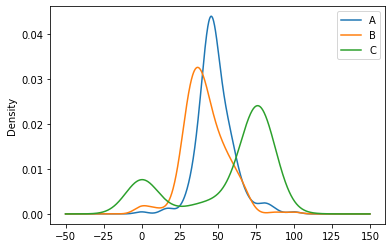

In [32]:
X_bases = X_int.apply(lambda x: gd.compress_int_array(x, deviation_bits=DEVIATION_BITS, output="integer"), axis = 1)
X_bases = pd.DataFrame(pd.DataFrame(X_bases)[0].to_list(), columns=COLUMNS)
X_bases.plot.density()

## Isolation Forest

In [33]:
rng = np.random.RandomState(42)

outliers = y.where(lambda x: x == -1).dropna()
outlier_indices = outliers.index
X_outliers = X_bases.filter(items=outlier_indices, axis=0)
X_outliers = np.array(X_outliers)

X = np.array(X_bases)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rng)

clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
dec_function = clf.decision_function(X_train)
pd.concat([pd.DataFrame(X_train),pd.DataFrame(dec_function)], axis=1)

,0,1,2,0
0,40,28,72,0.057329
1,48,40,76,0.140632
2,48,36,76,0.140056
3,64,60,84,-0.029853
4,48,48,76,0.097538
...,...,...,...,...
138,48,36,76,0.140056
139,52,36,76,0.114469
140,56,36,76,0.079334
141,32,56,0,0.035202


In [34]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)

confusion_matrix(y_test, y_pred_test, labels=[1, -1])

array([[49, 21],
       [ 1,  0]])